In [ ]:
# Matplotlib library is used for data visualization 
# Numpy and Pandas library are for data wrangling and preprocessing. 
# Plotly express library allows to zoom into a particular datapoint in visualizer.
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from datetime import datetime
import plotly.express as px
import seaborn as sns

mpl.rcParams['figure.figsize'] = (10,8)
mpl.rcParams['axes.grid'] = False

In [ ]:
# South Korea Bike Data set from UCI Machine Learning repository is used in this Assignment. 
# It is a time series dataset that includes number of bikes rented each hour daily on yearly basis.
# Assigning the dataset to the dataframe df
# Unicode escape produces a string that is suitable as Unicode literal in Python source code
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00560/SeoulBikeData.csv',encoding = 'unicode_escape')

In [ ]:
# The dataset has 8760 rows and 14 columns.
# The observations are for every hour. 
# The Date and Hour columns are merged to create a DateTime column.
df

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [ ]:
df.dtypes

Date                          object
Rented Bike Count              int64
Hour                           int64
Temperature(°C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(°C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Seasons                       object
Holiday                       object
Functioning Day               object
dtype: object

In [ ]:
df['Hour'] = pd.to_datetime(df['Hour'], unit='h')

In [ ]:
df['Hour']= df['Hour'].dt.time

In [ ]:
df['Date'] = df['Date'].map(str) + ' ' + df['Hour'].map(str)

In [ ]:
df['Date'] = pd.to_datetime(df['Date']) 

In [ ]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,2017-01-12 00:00:00,254,00:00:00,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-01-12 01:00:00,204,01:00:00,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-01-12 02:00:00,173,02:00:00,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-01-12 03:00:00,107,03:00:00,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-01-12 04:00:00,78,04:00:00,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
df.columns = ['Date', 'Rented_Bike_Count','Hour','Temperature_in_Celcius','Humidity','Wind_speed','Visibility','Dew_point_temperature_C','Solar_Radiation_MJ/M2','Rainfall','Sonwfall','Seasons','Holiday','Functioning_Day']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Date                     8760 non-null   datetime64[ns]
 1   Rented_Bike_Count        8760 non-null   int64         
 2   Hour                     8760 non-null   object        
 3   Temperature_in_Celcius   8760 non-null   float64       
 4   Humidity                 8760 non-null   int64         
 5   Wind_speed               8760 non-null   float64       
 6   Visibility               8760 non-null   int64         
 7   Dew_point_temperature_C  8760 non-null   float64       
 8   Solar_Radiation_MJ/M2    8760 non-null   float64       
 9   Rainfall                 8760 non-null   float64       
 10  Sonwfall                 8760 non-null   float64       
 11  Seasons                  8760 non-null   object        
 12  Holiday                  8760 non-

In [ ]:
df.describe()

,Rented_Bike_Count,Temperature_in_Celcius,Humidity,Wind_speed,Visibility,Dew_point_temperature_C,Solar_Radiation_MJ/M2,Rainfall,Sonwfall
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


count    8760.000000
mean      704.602055
std       644.997468
min         0.000000
25%       191.000000
50%       504.500000
75%      1065.250000
max      3556.000000
Name: Rented_Bike_Count, dtype: float64

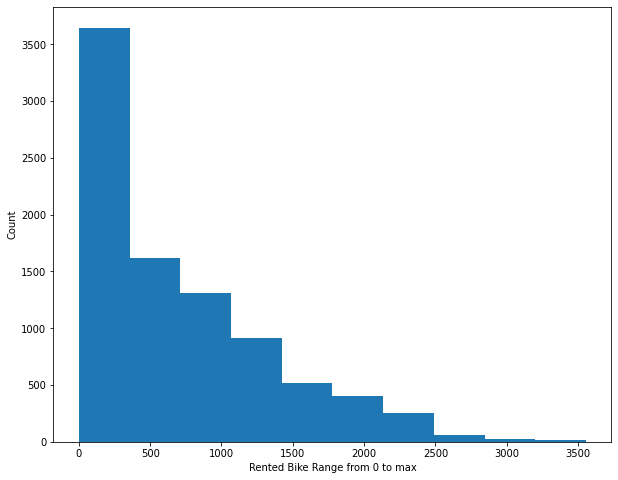

In [ ]:
# Distribution of 'price'
plt.xlabel('Rented Bike Range from 0 to max')
plt.ylabel('Count')
hist_max =plt.hist(df.Rented_Bike_Count)
df.Rented_Bike_Count.describe()

count    6342.000000
mean      370.636392
std       285.628124
min         0.000000
25%       139.000000
50%       292.000000
75%       592.000000
max      1000.000000
Name: Rented_Bike_Count, dtype: float64

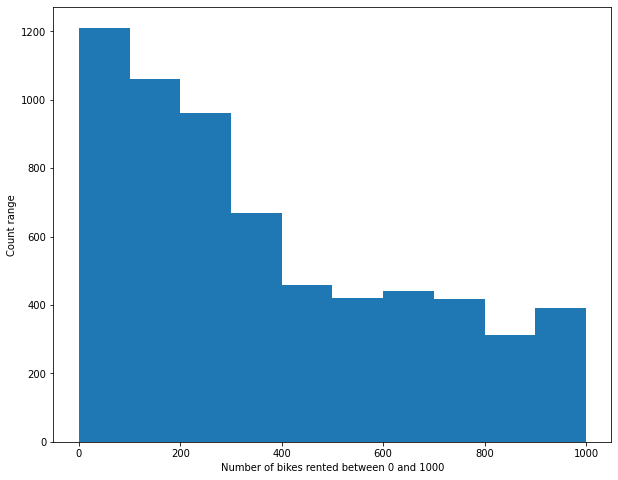

In [ ]:
# Distribution of 'Rented Bike Range'
# Observation : most listings have Rented Bike COunt less than 400
dataset =df[df["Rented_Bike_Count"]<=1000]
dataset["Rented_Bike_Count"].describe()
plt.xlabel('Number of bikes rented between 0 and 1000')
plt.ylabel('Count range')
hist_1000 =plt.hist(dataset.Rented_Bike_Count)

dataset.Rented_Bike_Count.describe()

count    3238.00000
mean      138.50803
std        90.39868
min         0.00000
25%        58.00000
50%       142.00000
75%       215.00000
max       300.00000
Name: Rented_Bike_Count, dtype: float64

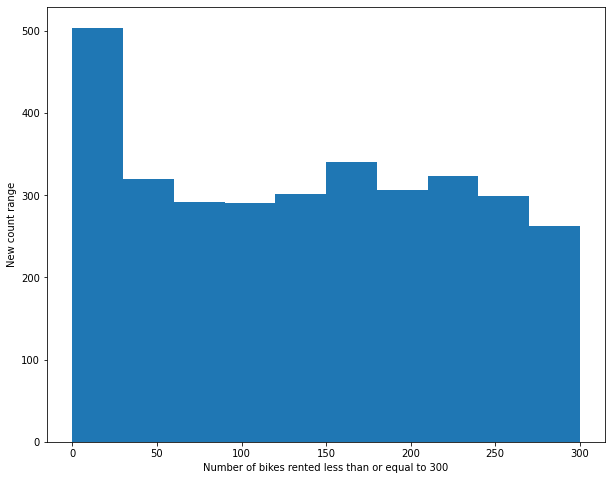

In [ ]:
# Distribution of 'Rented Bike Range'
# Observation : most listings have Rented Bike COunt less than 300
dataset_1 =df[df["Rented_Bike_Count"]<=300]
dataset_1["Rented_Bike_Count"].describe()
plt.xlabel('Number of bikes rented less than or equal to 300')
plt.ylabel('New count range')
hist_300 =plt.hist(dataset_1.Rented_Bike_Count)

dataset_1.Rented_Bike_Count.describe()

In [ ]:
# Average Rented_Bike_Count per Season
RB_Count =df.groupby("Seasons")["Rented_Bike_Count"].mean()
RB_Count

Seasons
Autumn     819.597985
Spring     730.031250
Summer    1034.073370
Winter     225.541204
Name: Rented_Bike_Count, dtype: float64

In [ ]:
pd.crosstab(df.Seasons,df.Holiday)

Holiday,Holiday,No Holiday
Seasons,,
Autumn,120,2064
Spring,72,2136
Summer,48,2160
Winter,192,1968


In [ ]:
pd.crosstab(df.Seasons,df.Holiday, margins = True,normalize = True)

Holiday,Holiday,No Holiday,All
Seasons,,,
Autumn,0.013699,0.235616,0.249315
Spring,0.008219,0.243836,0.252055
Summer,0.005479,0.246575,0.252055
Winter,0.021918,0.224658,0.246575
All,0.049315,0.950685,1.000000


In [ ]:
pd.crosstab(df.Functioning_Day,df.Seasons)

Seasons,Autumn,Spring,Summer,Winter
Functioning_Day,,,,
No,247,48,0,0
Yes,1937,2160,2208,2160


In [ ]:
# Drawing a line chart, the reset index will take out the index. 
# In x - axis the 'Date' column is passed and in y-axis the 'Rented Bike Count' column

fig = px.line(df.reset_index(), x='Date', y='Rented_Bike_Count', title='Seoul Bike Data')
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
                     dict(count=1, label='1y', step='year', stepmode='backward'),
                     dict(count=2, label='3y', step='year', stepmode='backward'),
                     dict(count=3, label='5y', step='year', stepmode='backward'),
                     dict(step='all')
        ])
    )
)
fig.show()

The line graph shows data from Jan 2017 to Dec 2018. The spikes show high number of rented bikes and lines close to the margin show low number of rented bikes.

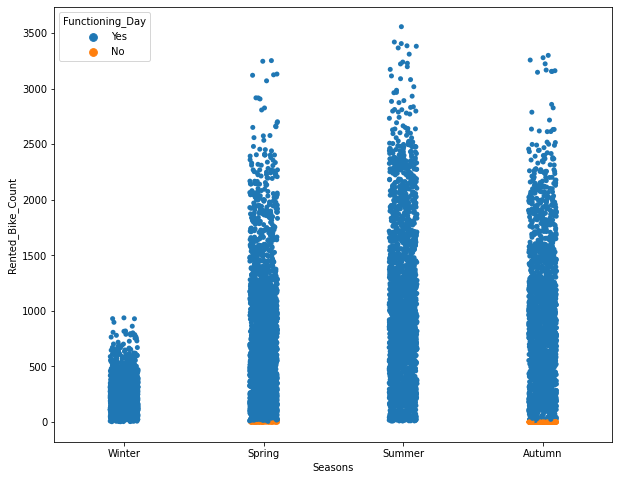

In [ ]:
### Lets see the distributuion of Seasons and Rented Bike Count
plott = sns.stripplot(x="Seasons", y="Rented_Bike_Count", hue="Functioning_Day", data=df)
plott

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



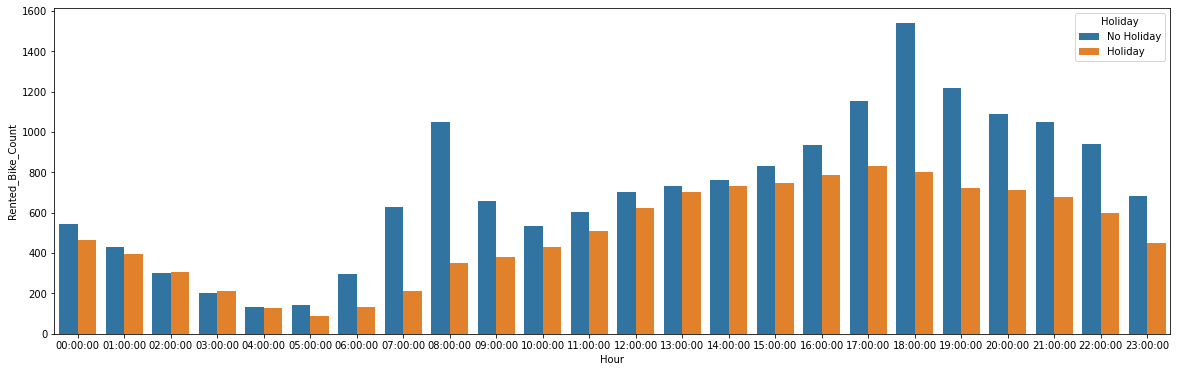

In [ ]:
# Rented Bike Count for different hours of the day and holiday
plt.figure(figsize=(20, 6))
sns.barplot(df.Hour, df.Rented_Bike_Count, hue=df.Holiday, ci=None)

In [ ]:
# Seasons
df['Seasons'].value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

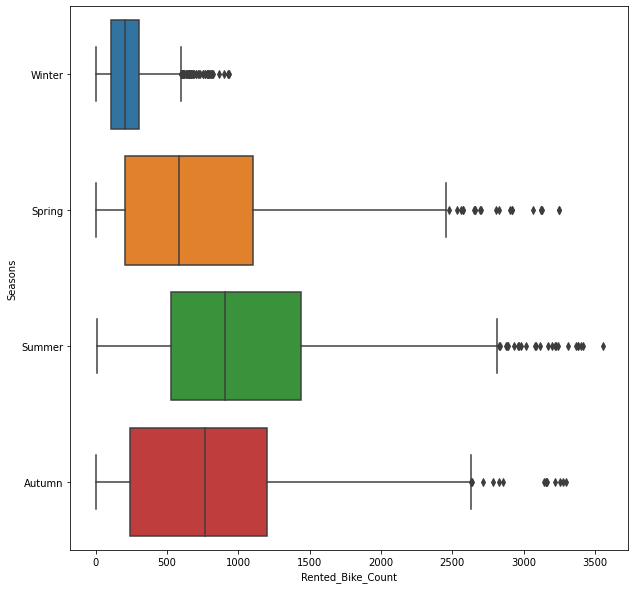

In [ ]:
# Seasons vs Rented Bike Count

plt.figure(figsize=(10,10))
ax =sns.boxplot(data = df, x= "Rented_Bike_Count",y= "Seasons")

Index(['Date', 'Rented_Bike_Count', 'Hour', 'Temperature_in_Celcius',
       'Humidity', 'Wind_speed', 'Visibility', 'Dew_point_temperature_C',
       'Solar_Radiation_MJ/M2', 'Rainfall', 'Sonwfall', 'Seasons', 'Holiday',
       'Functioning_Day'],
      dtype='object')

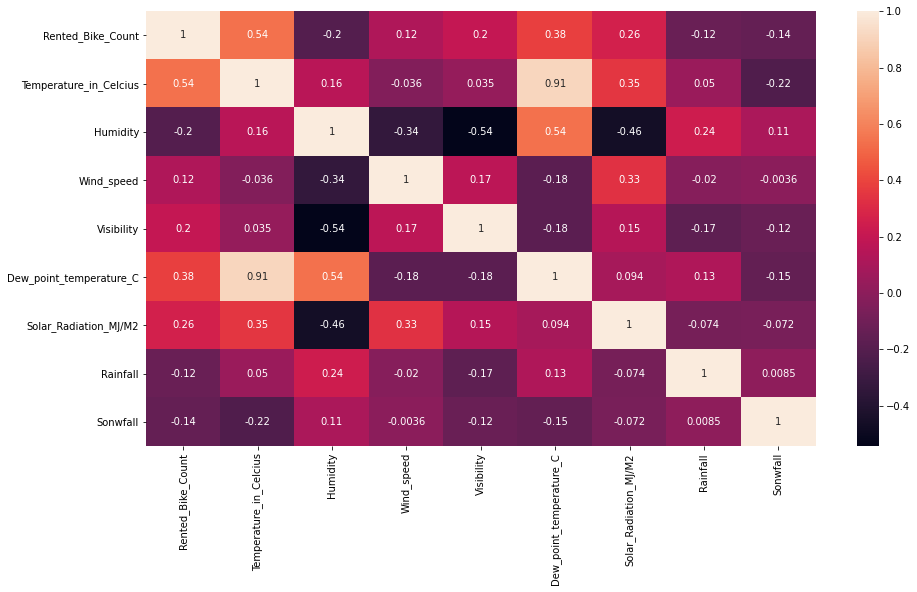

In [ ]:
### Plotting correlation matrix 
corr = df.corr(method='pearson')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)
df.columns

In [ ]:
# Encoding categorical variables -> Feature Engineering

'''df['Seasons'] = df['Seasons'].factorize()[0]
df['Holiday'] = df['Holiday'].factorize()[0]
df['Functioning_Day']= df['Functioning_Day'].factorize()[0]
df['Hour']= df['Hour'].factorize()[0]'''


"df['Seasons'] = df['Seasons'].factorize()[0]\ndf['Holiday'] = df['Holiday'].factorize()[0]\ndf['Functioning_Day']= df['Functioning_Day'].factorize()[0]\ndf['Hour']= df['Hour'].factorize()[0]"

In [ ]:
#DEALING WITH CATEGORICAL DATA THAT ARE NOMINAL .. ONE_HOT_ENCODING

Seasons_dummies=pd.get_dummies(df.Seasons)
Holiday_dummies=pd.get_dummies(df.Holiday)
FunctioningDay_dummies=pd.get_dummies(df['Functioning_Day'])
df['Hour']= df['Hour'].factorize()[0]
merged=None
merged=pd.concat([df,Seasons_dummies,Holiday_dummies,FunctioningDay_dummies],axis='columns')
#TO AVOID DUMMY_VARIABLE TRAP WE NEED TO DROP SOME COLUMNS
final=merged.drop(['Seasons','Holiday','Functioning_Day','Winter','No'],axis='columns')
final.head()


,Date,Rented_Bike_Count,Hour,Temperature_in_Celcius,Humidity,Wind_speed,Visibility,Dew_point_temperature_C,Solar_Radiation_MJ/M2,Rainfall,Sonwfall,Autumn,Spring,Summer,No Holiday,Yes
0,2017-01-12 00:00:00,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,0,0,1,1
1,2017-01-12 01:00:00,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,0,0,1,1
2,2017-01-12 02:00:00,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,0,0,1,1
3,2017-01-12 03:00:00,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,0,0,1,1
4,2017-01-12 04:00:00,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,0,0,1,1


Index(['Date', 'Rented_Bike_Count', 'Hour', 'Temperature_in_Celcius',
       'Humidity', 'Wind_speed', 'Visibility', 'Dew_point_temperature_C',
       'Solar_Radiation_MJ/M2', 'Rainfall', 'Sonwfall', 'Autumn', 'Spring',
       'Summer', 'No Holiday', 'Yes'],
      dtype='object')

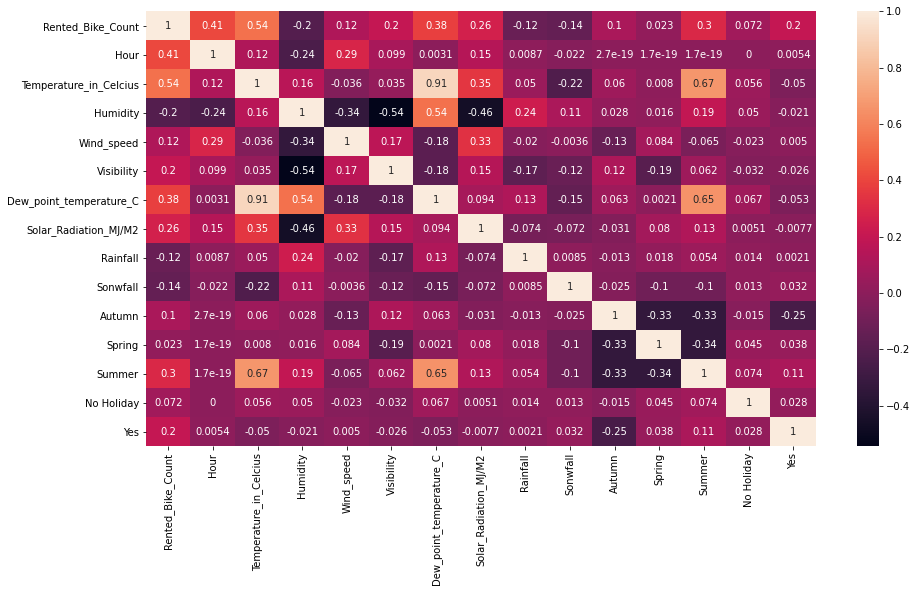

In [ ]:
### Plotting correlation matrix 
corr = final.corr(method='pearson')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)
final.columns

In [ ]:
final.head(10)

,Date,Rented_Bike_Count,Hour,Temperature_in_Celcius,Humidity,Wind_speed,Visibility,Dew_point_temperature_C,Solar_Radiation_MJ/M2,Rainfall,Sonwfall,Autumn,Spring,Summer,No Holiday,Yes
0,2017-01-12 00:00:00,254,0,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,0,0,0,1,1
1,2017-01-12 01:00:00,204,1,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,0,0,0,1,1
2,2017-01-12 02:00:00,173,2,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,0,0,0,1,1
3,2017-01-12 03:00:00,107,3,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,0,0,0,1,1
4,2017-01-12 04:00:00,78,4,-6.0,36,2.3,2000,-18.6,0.00,0.0,0.0,0,0,0,1,1
5,2017-01-12 05:00:00,100,5,-6.4,37,1.5,2000,-18.7,0.00,0.0,0.0,0,0,0,1,1
6,2017-01-12 06:00:00,181,6,-6.6,35,1.3,2000,-19.5,0.00,0.0,0.0,0,0,0,1,1
7,2017-01-12 07:00:00,460,7,-7.4,38,0.9,2000,-19.3,0.00,0.0,0.0,0,0,0,1,1
8,2017-01-12 08:00:00,930,8,-7.6,37,1.1,2000,-19.8,0.01,0.0,0.0,0,0,0,1,1
9,2017-01-12 09:00:00,490,9,-6.5,27,0.5,1928,-22.4,0.23,0.0,0.0,0,0,0,1,1


In [ ]:
all_data = final.drop(['Date'],axis=1)

In [ ]:
# Train test split
from sklearn.model_selection import train_test_split
y = all_data['Rented_Bike_Count']
x= all_data.drop(['Rented_Bike_Count'],axis=1)
x_train, x_test, y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 105)

In [ ]:
x.dtypes


Hour                         int64
Temperature_in_Celcius     float64
Humidity                     int64
Wind_speed                 float64
Visibility                   int64
Dew_point_temperature_C    float64
Solar_Radiation_MJ/M2      float64
Rainfall                   float64
Sonwfall                   float64
Autumn                       uint8
Spring                       uint8
Summer                       uint8
No Holiday                   uint8
Yes                          uint8
dtype: object

In [ ]:
analysis_dict = {
    'Train Score' : [],
    'Test Score' : [],
    'Regression Score' : [],
    'Mean Squared Error' : []
}

In [ ]:
# Modelling

# Linear Regression

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import preprocessing, metrics 

linreg = LinearRegression()
linreg.fit(x_train,y_train)
y_pred = (linreg.predict(x_test))

print('R-squared train score: {:.3f}'.format(linreg.score(x_train, y_train)))
print('R-squared test score: {:.3f}'.format(linreg.score(x_test, y_test)))

### Calculate RMSE
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print(f'Linear Regression Score:{linreg.score(x_train, y_train)}')
print(f'Linear Regression Mean Squared Error:{rmse}')

analysis_dict['Train Score'].append(linreg.score(x_train, y_train))
analysis_dict['Test Score'].append(linreg.score(x_test, y_test))
analysis_dict['Regression Score'].append(linreg.score(x_train, y_train))
analysis_dict['Mean Squared Error'].append(rmse/100) # Here rmse is diveded by 100 for visualization

R-squared train score: 0.553
R-squared test score: 0.535
Linear Regression Score:0.5533974831297525
Linear Regression Mean Squared Error:427.74611029693034


In [ ]:
### R squared value
linreg.score(x_train, y_train)
### Coefficients
linreg.coef_

Coeff = pd.DataFrame(columns=["Variable","Coefficient"])
Coeff["Variable"]=x_train.columns
Coeff["Coefficient"]=linreg.coef_
Coeff.sort_values("Coefficient")

,Variable,Coefficient
6,Solar_Radiation_MJ/M2,-82.857029
7,Rainfall,-56.253423
2,Humidity,-12.095252
4,Visibility,-0.000705
5,Dew_point_temperature_C,14.138823
1,Temperature_in_Celcius,14.386401
3,Wind_speed,22.385184
0,Hour,26.945037
8,Sonwfall,35.378234
12,No Holiday,102.703915


In [ ]:
import statsmodels.api as sm
### Taking a closer look at the estimates
X2 = sm.add_constant(x_train)
est_linear = sm.OLS(y_train, X2)
est_linear2 = est_linear.fit()
print(est_linear2.summary())

                            OLS Regression Results                            
Dep. Variable:      Rented_Bike_Count   R-squared:                       0.553
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     618.9
Date:                Fri, 09 Apr 2021   Prob (F-statistic):               0.00
Time:                        15:28:11   Log-Likelihood:                -52500.
No. Observations:                7008   AIC:                         1.050e+05
Df Residuals:                    6993   BIC:                         1.051e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    -

In [ ]:
# Ridge Regression
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(x_train,y_train)
y_pred1 = (ridge.predict(x_test))

print('R-squared train score: {:.3f}'.format(ridge.score(x_train,y_train)))
print('R-squared test score: {:.3f}'.format(ridge.score(x_test,y_test)))

### Calculate RMSE
rmse1 = np.sqrt(metrics.mean_squared_error(y_test, y_pred1))
print(f'Ridge Regression Score:{ridge.score(x_train, y_train)}')
print(f'Ridge Regression Mean Squared Error:{rmse1}')

analysis_dict['Train Score'].append(ridge.score(x_train, y_train))
analysis_dict['Test Score'].append(ridge.score(x_test, y_test))
analysis_dict['Regression Score'].append(ridge.score(x_train, y_train))
analysis_dict['Mean Squared Error'].append(rmse1/100) # Here rmse is diveded by 100 for visualization

R-squared train score: 0.553
R-squared test score: 0.535
Ridge Regression Score:0.5533955035152389
Ridge Regression Mean Squared Error:427.75278048462945


In [ ]:
### R squared value
ridge.score(x_train, y_train)
### Coefficients
ridge.coef_

Coeff1 = pd.DataFrame(columns=["Variable","Coefficient"])
Coeff1["Variable"]=x_train.columns
Coeff1["Coefficient"]=ridge.coef_
Coeff1.sort_values("Coefficient")

,Variable,Coefficient
6,Solar_Radiation_MJ/M2,-82.866987
7,Rainfall,-56.243040
2,Humidity,-12.086316
4,Visibility,-0.000575
5,Dew_point_temperature_C,14.125924
1,Temperature_in_Celcius,14.452646
3,Wind_speed,22.318194
0,Hour,26.940496
8,Sonwfall,35.286988
12,No Holiday,102.750280


In [ ]:
# Lasso Regression
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=10,max_iter = 10000)
lasso.fit(x_train, y_train)
y_pred2 = (lasso.predict(x_test))

print('R-squared score (training): {:.3f}'.format(lasso.score(x_train, y_train)))
print('R-squared score (test): {:.3f}'.format(lasso.score(x_test, y_test)))

### Calculate RMSE
rmse2 = np.sqrt(metrics.mean_squared_error(y_test, y_pred2))
# print(f'Lasso Regression Score:{ridge.score(x_train, y_train)}')
print(f'Lasso Regression Score:{lasso.score(x_train, y_train)}')
print(f'Lasso Regression Mean Squared Error:{rmse2}')

analysis_dict['Train Score'].append(lasso.score(x_train, y_train))
analysis_dict['Test Score'].append(lasso.score(x_test, y_test))
analysis_dict['Regression Score'].append(lasso.score(x_train, y_train))
analysis_dict['Mean Squared Error'].append(rmse2/100) # Here rmse is diveded by 100 for visualization

R-squared score (training): 0.533
R-squared score (test): 0.512
Lasso Regression Score:0.5331512154311615
Lasso Regression Mean Squared Error:438.01274056664533


In [ ]:
### R squared value
lasso.score(x_train, y_train)
### Coefficients
lasso.coef_

Coeff = pd.DataFrame(columns=["Variable","Coefficient"])
Coeff["Variable"]=x_train.columns
Coeff["Coefficient"]=lasso.coef_
Coeff.sort_values("Coefficient")

,Variable,Coefficient
6,Solar_Radiation_MJ/M2,-52.242291
7,Rainfall,-48.279492
2,Humidity,-10.167233
3,Wind_speed,0.000000
8,Sonwfall,0.000000
11,Summer,-0.000000
12,No Holiday,0.000000
4,Visibility,0.018320
5,Dew_point_temperature_C,11.256266
1,Temperature_in_Celcius,20.339973


In [ ]:
# Decision Tree Regressor

from sklearn.tree import DecisionTreeRegressor

DTree = DecisionTreeRegressor(min_samples_leaf = 0.0001)
DTree.fit(x_train,y_train)
y_pred3 = (DTree.predict(x_test))

print('R-squared score(training): {:.3f}'.format(DTree.score(x_train,y_train)))
print('R-squared score(test): {:.3f}'.format(DTree.score(x_test,y_test)))

### Calculate RMSE
rmse3 = np.sqrt(metrics.mean_squared_error(y_test, y_pred3))
# print(f'DecisionTree Regression Score:{ridge.score(x_train, y_train)}')
print(f'DecisionTree Regression Score:{DTree.score(x_train, y_train)}')
print(f'DecisionTree Regression Mean Squared Error:{rmse3}')

analysis_dict['Train Score'].append(DTree.score(x_train, y_train))
analysis_dict['Test Score'].append(DTree.score(x_test, y_test))
analysis_dict['Regression Score'].append(DTree.score(x_train, y_train))
analysis_dict['Mean Squared Error'].append(rmse3/100) # Here rmse is diveded by 100 for visualization

R-squared score(training): 1.000
R-squared score(test): 0.750
DecisionTree Regression Score:1.0
DecisionTree Regression Mean Squared Error:313.6160782239137


In [ ]:
from sklearn.ensemble import RandomForestRegressor

### Initially, lets build a tree with constraints.
regrRM2 = RandomForestRegressor(n_estimators=200, max_depth = 50, min_samples_split = 5,min_samples_leaf =4)
regrRM2.fit(x_train, y_train)

### We get a smaller value for R squared
print(f'Random Forest Regressor Score:{regrRM2.score(x_train, y_train)}')
y_pred5= regrRM2.predict(x_test)
rmse4 = np.sqrt(metrics.mean_squared_error(y_test,y_pred5))
print(f'Random Forest Regressor (n=200) Mean Squared Error:{rmse4}')
CoeffRM2 = pd.DataFrame(columns=["Variable","FeatureImportance"])
CoeffRM2["Variable"]=x_train.columns
CoeffRM2["FeatureImportance"]=regrRM2.feature_importances_
CoeffRM2.sort_values("FeatureImportance", ascending = True)



Random Forest Regressor Score:0.9477001126652109
Random Forest Regressor (n=200) Mean Squared Error:228.05130161954057


,Variable,FeatureImportance
12,No Holiday,0.000826
8,Sonwfall,0.001421
11,Summer,0.001483
10,Spring,0.006371
3,Wind_speed,0.011684
4,Visibility,0.014308
9,Autumn,0.020927
5,Dew_point_temperature_C,0.027746
7,Rainfall,0.048118
2,Humidity,0.068536


In [ ]:
analysis_dict['Train Score'].append(regrRM2.score(x_train, y_train))
analysis_dict['Test Score'].append(regrRM2.score(x_test, y_test))
analysis_dict['Regression Score'].append(regrRM2.score(x_train, y_train))
analysis_dict['Mean Squared Error'].append(rmse4/100) # Here rmse is diveded by 100 for visualization

In [ ]:
from sklearn.ensemble import RandomForestRegressor

### lets build a tree without constraints.
regrRM = RandomForestRegressor(n_estimators=300)
regrRM.fit(x_train, y_train)
print(f'Random Forest Regressor Score:{regrRM.score(x_train, y_train)}')
y_pred4= regrRM.predict(x_test)
rmse4 = np.sqrt(metrics.mean_squared_error(y_test,y_pred4))
print(f'Random Forest Regressor (n=300) Mean Squared Error:{rmse4}')

### Using feature importance, we can see which feature had most weight
regrRM.feature_importances_

Random Forest Regressor Score:0.982758406441692
Random Forest Regressor (n=300) Mean Squared Error:225.09676826681482


array([0.27785285, 0.31984071, 0.07374336, 0.01775077, 0.01875542,
       0.03377656, 0.09445703, 0.04455349, 0.00133283, 0.02221495,
       0.00702313, 0.00177949, 0.00205407, 0.08486535])

In [ ]:
CoeffRM1 = pd.DataFrame(columns=["Variable","FeatureImportance"])
CoeffRM1["Variable"]=x_train.columns
CoeffRM1["FeatureImportance"]=regrRM.feature_importances_
CoeffRM1.sort_values("FeatureImportance", ascending = True)

,Variable,FeatureImportance
8,Sonwfall,0.001333
11,Summer,0.001779
12,No Holiday,0.002054
10,Spring,0.007023
3,Wind_speed,0.017751
4,Visibility,0.018755
9,Autumn,0.022215
5,Dew_point_temperature_C,0.033777
7,Rainfall,0.044553
2,Humidity,0.073743


In [ ]:
analysis_dict['Train Score'].append(regrRM.score(x_train, y_train))
analysis_dict['Test Score'].append(regrRM.score(x_test, y_test))
analysis_dict['Regression Score'].append(regrRM.score(x_train, y_train))
analysis_dict['Mean Squared Error'].append(rmse4/100) # Here rmse is diveded by 100 for visualization

In [ ]:
analysis_df = pd.DataFrame(
    analysis_dict, index=['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'Decision Tree Regression', 'Random Forest Regressor(200)', 'RandomForestRegressor(300)']
)
analysis_df

,Train Score,Test Score,Regression Score,Mean Squared Error
Linear Regression,0.553397,0.535073,0.553397,4.277461
Ridge Regression,0.553396,0.535058,0.553396,4.277528
Lasso Regression,0.533151,0.512487,0.533151,4.380127
Decision Tree Regression,1.000000,0.750075,1.000000,3.136161
Random Forest Regressor(200),0.947700,0.867847,0.947700,2.280513
RandomForestRegressor(300),0.982758,0.871249,0.982758,2.250968


In [ ]:
analysis_df.sort_values('Mean Squared Error', inplace=True)

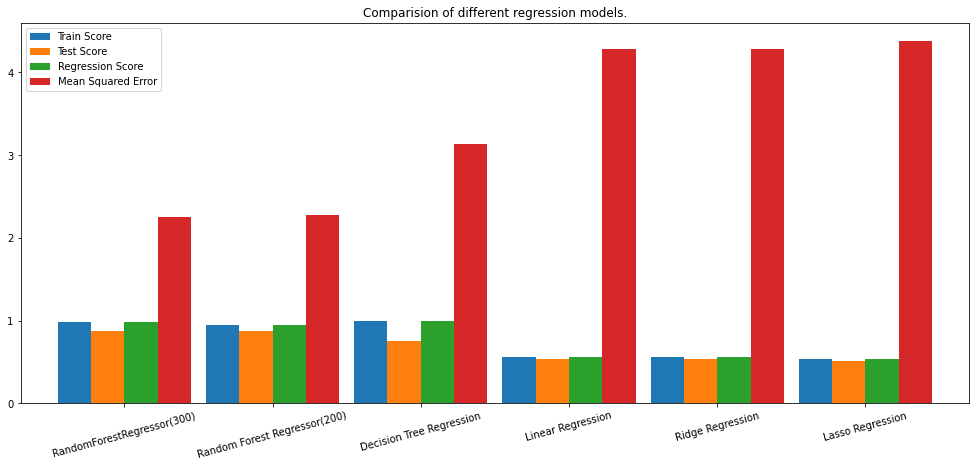

In [ ]:
analysis_df.plot.bar(rot=15, title="Comparision of different regression models.", width = 0.9, figsize=(17,7))

********THE END********